In [1]:
import seaborn as sns
import pandas as pd
df=sns.load_dataset("iris")

In [2]:
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [3]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
df["species"]=encoder.fit_transform(df["species"])

In [4]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [7]:
df=df[df["species"]!=0][["sepal_width","petal_length","species"]]

In [8]:
df

,sepal_width,petal_length,species
50,3.2,4.7,1
51,3.2,4.5,1
52,3.1,4.9,1
53,2.3,4.0,1
54,2.8,4.6,1
...,...,...,...
145,3.0,5.2,2
146,2.5,5.0,2
147,3.0,5.2,2
148,3.4,5.4,2


In [9]:
df=df.sample(100)

In [10]:
df

,sepal_width,petal_length,species
67,2.7,4.1,1
61,3.0,4.2,1
91,3.0,4.6,1
138,3.0,4.8,2
53,2.3,4.0,1
...,...,...,...
65,3.1,4.4,1
131,3.8,6.4,2
120,3.2,5.7,2
125,3.2,6.0,2


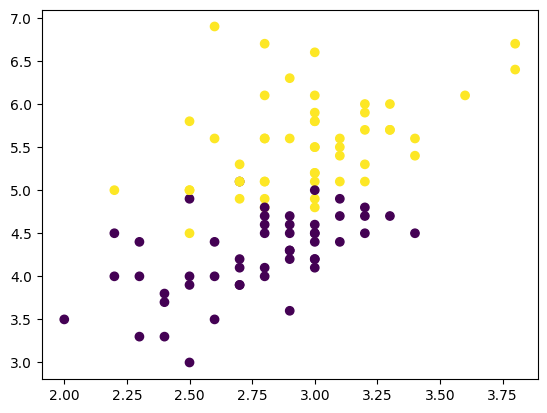

In [19]:
import matplotlib.pyplot as plt
plt.scatter(x=df["sepal_width"],y=df["petal_length"],c=df["species"])

In [21]:
df_train=df.iloc[:60,:].sample(10)
df_train
df_val=df.iloc[60:80,:].sample(5)
df_test=df.iloc[80:,:].sample(5)

In [22]:
df_val

,sepal_width,petal_length,species
142,2.7,5.1,2
92,2.6,4.0,1
84,3.0,4.5,1
64,2.9,3.6,1
117,3.8,6.7,2


In [23]:
X_test=df_val.iloc[:,0:2].values
y_test=df_val.iloc[:,-1].values

In [25]:
#Case 1 Bagging
#Data for tree 1
df_bag=df_train.sample(8,replace=True)

X=df_bag.iloc[:,0:2]
y=df_bag.iloc[:,-1]

df_bag

,sepal_width,petal_length,species
128,2.8,5.6,2
143,3.2,5.9,2
118,2.6,6.9,2
63,2.9,4.7,1
143,3.2,5.9,2
63,2.9,4.7,1
128,2.8,5.6,2
109,3.6,6.1,2


In [26]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from mlxtend.plotting import plot_decision_regions
from sklearn.metrics import accuracy_score


In [32]:
dt_bag1=DecisionTreeClassifier()

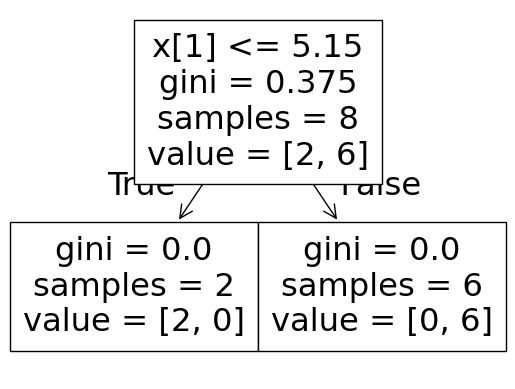

c:\Users\lucius seneca\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
c:\Users\lucius seneca\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


0.8


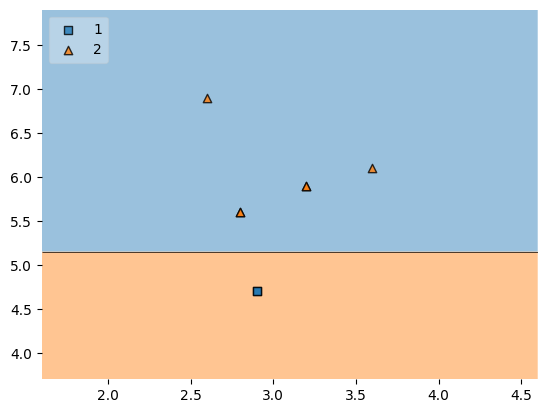

In [33]:

evaluate(dt_bag1,X,y)

In [28]:
def evaluate(clf,X,y):
    clf.fit(X,y)
    plot_tree(clf)
    plt.show()
    plot_decision_regions(X.values,y.values,clf=clf,legend=2)
    y_pred=clf.predict(X_test)
    print(accuracy_score(y_test,y_pred))